In [3]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
# Step 2: Load and Preprocess the Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [5]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# One-hot) encoding of labels (multi-class classification)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, )

In [7]:

# Step 3: Build the MLP Model
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Input layer (flatten the image)
    Dense(128, activation='relu'),      # Hidden layer 1
    Dense(64, activation='relu'),       # Hidden layer 2
    Dense(10, activation='softmax')     # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Step 5: Train the Model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7685 - loss: 0.6661 - val_accuracy: 0.8539 - val_loss: 0.4127
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8606 - loss: 0.3867 - val_accuracy: 0.8583 - val_loss: 0.3992
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8719 - loss: 0.3477 - val_accuracy: 0.8759 - val_loss: 0.3473
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8841 - loss: 0.3137 - val_accuracy: 0.8710 - val_loss: 0.3522
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8885 - loss: 0.2979 - val_accuracy: 0.8774 - val_loss: 0.3394


In [10]:

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8698 - loss: 0.3608
Test Accuracy: 0.8693000078201294


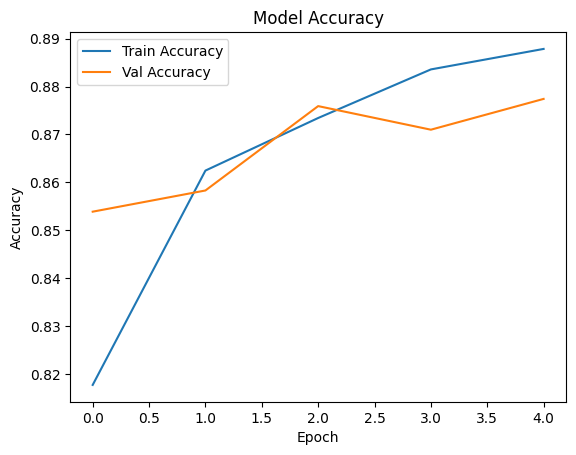

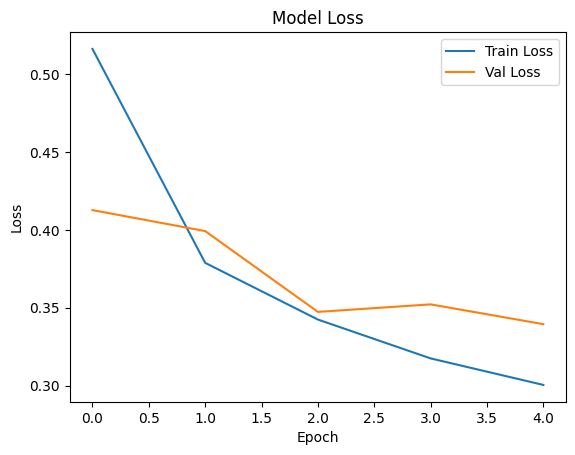

In [11]:
# Step 7: Plot Accuracy and Loss Curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()